### Stock Market Prediction And Forecasting Using Stacked LSTM

Download the data using the below website

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

open any sources signup and login you will get an API key which you will be using to get the data. You can get any company data

In [1]:
### Data Collection
import pandas_datareader as pdr
key="" #insert an API key to get the data.

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
#Saving the data
df.to_csv('AAPL.csv')

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('AAPL.csv')

In [7]:
df.head()
#df.shape

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-10-31 00:00:00+00:00,113.54,114.23,113.20,113.65,26419398,26.615795,26.777543,26.536093,26.641581,105677592,0.00,1.0
1,AAPL,2016-11-01 00:00:00+00:00,111.49,113.77,110.53,113.46,43825812,26.135238,26.669711,25.910197,26.597041,175303248,0.00,1.0
2,AAPL,2016-11-02 00:00:00+00:00,111.59,112.35,111.23,111.40,28331709,26.158680,26.336838,26.074290,26.114141,113326836,0.00,1.0
3,AAPL,2016-11-03 00:00:00+00:00,109.83,111.46,109.55,110.98,26932602,25.879723,26.263807,25.813745,26.150703,107730408,0.57,1.0
4,AAPL,2016-11-04 00:00:00+00:00,108.84,110.25,108.11,108.53,30836997,25.646445,25.978690,25.474432,25.573398,123347988,0.00,1.0


In [8]:
df1 = df.reset_index()['close']

In [9]:
df1

0       113.54
1       111.49
2       111.59
3       109.83
4       108.84
         ...  
1253    148.69
1254    148.64
1255    149.32
1256    148.85
1257    152.57
Name: close, Length: 1258, dtype: float64

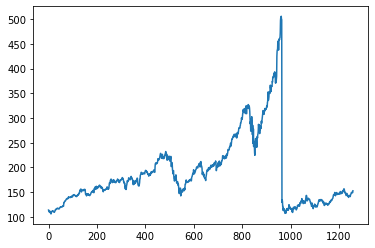

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1

array([[0.01955642],
       [0.01443629],
       [0.01468605],
       ...,
       [0.10892152],
       [0.10774764],
       [0.11703881]])

In [19]:
##splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [25]:
training_size, test_size

(817, 441)

In [31]:
# convert an array of values into a dataset matrix
#import numpy as np
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [60]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [61]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [62]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [64]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [65]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [67]:
#Training the model
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs=150, batch_size=60, verbose=1)

Epoch 1/150
12/12 [==============================] - 12s 339ms/step - loss: 0.0132 - val_loss: 0.0259
Epoch 2/150
12/12 [==============================] - 3s 215ms/step - loss: 0.0032 - val_loss: 0.0227
Epoch 3/150
12/12 [==============================] - 3s 215ms/step - loss: 0.0014 - val_loss: 0.0206
Epoch 4/150
12/12 [==============================] - 3s 214ms/step - loss: 6.8839e-04 - val_loss: 0.0228
Epoch 5/150
12/12 [==============================] - 3s 226ms/step - loss: 5.3077e-04 - val_loss: 0.0232-
Epoch 6/150
12/12 [==============================] - 3s 215ms/step - loss: 4.7302e-04 - val_loss: 0.0225
Epoch 7/150
12/12 [==============================] - 3s 224ms/step - loss: 4.7234e-04 - val_loss: 0.0214
Epoch 8/150
12/12 [==============================] - 3s 225ms/step - loss: 4.4630e-04 - val_loss: 0.0228
Epoch 9/150
12/12 [==============================] - 3s 219ms/step - loss: 4.3575e-04 - val_loss: 0.0232
Epoch 10/150
12/12 [==============================] - 3s 214ms/st

In [112]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
#train_predict

In [79]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [80]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.23030406157227098

In [81]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.3246834280429048

In [110]:
len(df1)

1258

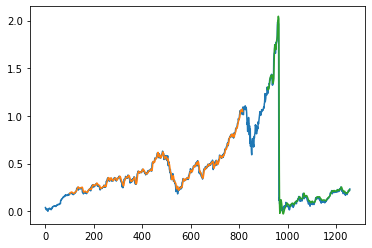

In [103]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [107]:
x_input=test_data[341:].reshape(1,-1)
x_input

array([[0.05349918, 0.0509516 , 0.05404865, 0.06186623, 0.05976822,
        0.06104201, 0.06513812, 0.06181627, 0.06641191, 0.07060792,
        0.06990859, 0.06918427, 0.06843499, 0.07260602, 0.07647735,
        0.07805085, 0.07882512, 0.08554373, 0.09068885, 0.0970578 ,
        0.09373595, 0.09840651, 0.09688296, 0.09973026, 0.10849693,
        0.10682352, 0.10160348, 0.09176283, 0.10100405, 0.09913083,
        0.1026275 , 0.10702333, 0.10809731, 0.10255258, 0.09808182,
        0.09973026, 0.10027973, 0.09943054, 0.10402618, 0.10300215,
        0.10327689, 0.10097907, 0.10085419, 0.09963035, 0.10027973,
        0.10784754, 0.10837205, 0.11341725, 0.11109446, 0.10152855,
        0.10237774, 0.10609921, 0.1098956 , 0.10967081, 0.1065238 ,
        0.10447575, 0.10712323, 0.11841251, 0.11519057, 0.11688896,
        0.11973625, 0.12135971, 0.12732904, 0.12338279, 0.12078525,
        0.10804736, 0.10949598, 0.10592437, 0.10819721, 0.10759778,
        0.10077926, 0.09298666, 0.0942105 , 0.10

In [115]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
len(temp_input)

100

In [116]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11323313]
101
1 day input [0.0509516  0.05404865 0.06186623 0.05976822 0.06104201 0.06513812
 0.06181627 0.06641191 0.07060792 0.06990859 0.06918427 0.06843499
 0.07260602 0.07647735 0.07805085 0.07882512 0.08554373 0.09068885
 0.0970578  0.09373595 0.09840651 0.09688296 0.09973026 0.10849693
 0.10682352 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275
 0.10702333 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973
 0.09943054 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419
 0.09963035 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446
 0.10152855 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238
 0.10447575 0.10712323 0.11841251 0.11519057 0.11688896 0.11973625
 0.12135971 0.12732904 0.12338279 0.12078525 0.10804736 0.10949598
 0.10592437 0.10819721 0.10759778 0.10077926 0.09298666 0.0942105
 0.10025476 0.10270243 0.10292722 0.0990559  0.09041411 0.09271192
 0.08939008 0.09226235 0.08349568 0.088416   0.09063889 0.09386083
 0.09288676 0.09266197 0.08941506 0.

In [117]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

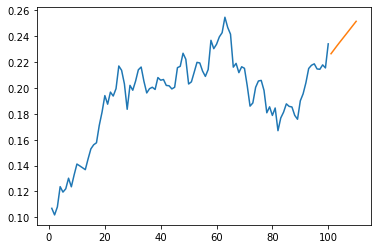

In [118]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

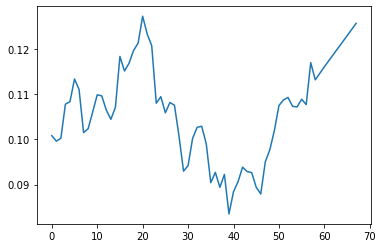

In [119]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [120]:
df3=scaler.inverse_transform(df3).tolist()

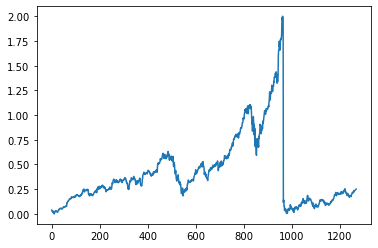

In [121]:
plt.plot(df3)